In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

In [96]:
filename = "../data/all_data.json"
#filename = "csb-53/data/all_data.json"

df = pd.read_json(filename, convert_dates=["release_date"])
df.set_index("link_album")

# Limit number of metacritic only albums, to not unbalance the model
df_metacritic = df.groupby([df["release_date"].dt.year]).apply(lambda grp: grp.nlargest(50, 'metascore'))

df = df[df["billboard"].notnull()
        | df["grammy"].notnull()
        | df["link_album"].isin(df_metacritic["link_album"].unique())]
df

,artist,album,release_date,userscore,metascore,link_album,link_img,genres,grammy,billboard
0,Sigur Rós,(),2002-10-29,88.0,82,https://www.metacritic.com/music/()/sigur-ros,https://static.metacritic.com/images/products/...,"[Indie, Rock]",None,None
1,Ed Sheeran,Divide,2017-03-03,47.0,62,https://www.metacritic.com/music/(divide)/ed-s...,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2017': 4, '2018': 5, '2019': 31, '2020': 65}"
2,Ed Sheeran,+,2012-06-12,76.0,67,https://www.metacritic.com/music/+/ed-sheeran,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2012': 136, '2013': 46, '2014': 122, '2015':..."
3,Jewel,0304,2003-06-03,63.0,63,https://www.metacritic.com/music/0304/jewel,https://static.metacritic.com/images/products/...,"[Pop, Adult Alternative, Singer-Songwriter]",None,{'2003': 110}
6,Sia,1000 Forms of Fear,2014-07-08,89.0,76,https://www.metacritic.com/music/1000-forms-of...,https://static.metacritic.com/images/products/...,"[Electronic, Club/Dance]",None,"{'2014': 131, '2015': 40, '2016': 129}"
...,...,...,...,...,...,...,...,...,...,...
3240,Logic,YSIV,2018-09-28,71.0,71,https://www.metacritic.com/music/ysiv/logic,https://static.metacritic.com/images/products/...,"[Rap, Pop-Rap, Contemporary Rap]",None,{'2018': 177}
3241,Joanna Newsom,Ys,2006-11-14,84.0,85,https://www.metacritic.com/music/ys/joanna-newsom,https://static.metacritic.com/images/products/...,"[Indie, Rock, Folk]",None,None
3242,Smashing Pumpkins,Zeitgeist,2007-07-10,77.0,59,https://www.metacritic.com/music/zeitgeist/the...,https://static.metacritic.com/images/products/...,"[Rock, Alternative]",None,{'2007': 165}
3244,Denzel Curry,ZUU,2019-05-31,80.0,85,https://www.metacritic.com/music/zuu/denzel-curry,https://static.metacritic.com/images/products/...,[Rap],None,None


In [73]:
df_genres_wrapped = df[["genres", "artist", "album", "link_album"]]
df_genres_wrapped


,genres,artist,album,link_album
0,"[Indie, Rock]",Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
1,[Pop/Rock],Ed Sheeran,Divide,https://www.metacritic.com/music/(divide)/ed-s...
2,[Pop/Rock],Ed Sheeran,+,https://www.metacritic.com/music/+/ed-sheeran
3,"[Pop, Adult Alternative, Singer-Songwriter]",Jewel,0304,https://www.metacritic.com/music/0304/jewel
6,"[Electronic, Club/Dance]",Sia,1000 Forms of Fear,https://www.metacritic.com/music/1000-forms-of...
...,...,...,...,...
3240,"[Rap, Pop-Rap, Contemporary Rap]",Logic,YSIV,https://www.metacritic.com/music/ysiv/logic
3241,"[Indie, Rock, Folk]",Joanna Newsom,Ys,https://www.metacritic.com/music/ys/joanna-newsom
3242,"[Rock, Alternative]",Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
3244,[Rap],Denzel Curry,ZUU,https://www.metacritic.com/music/zuu/denzel-curry


# Unwrap genres

In [74]:
all_albums = []
for v in df_genres_wrapped.values:
    # each genre
    if(v[0] is not None):
        for g in v[0]:
            all_albums.append((g, v[1], v[2], v[3]))
df_genres = pd.DataFrame(all_albums, columns=["genre", "artist", "album", "link_album"])
df_genres


,genre,artist,album,link_album
0,Indie,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
1,Rock,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
2,Pop/Rock,Ed Sheeran,Divide,https://www.metacritic.com/music/(divide)/ed-s...
3,Pop/Rock,Ed Sheeran,+,https://www.metacritic.com/music/+/ed-sheeran
4,Pop,Jewel,0304,https://www.metacritic.com/music/0304/jewel
...,...,...,...,...
5453,Rock,Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
5454,Alternative,Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
5455,Rap,Denzel Curry,ZUU,https://www.metacritic.com/music/zuu/denzel-curry
5456,Indie,My Morning Jacket,Z,https://www.metacritic.com/music/z/my-morning-...


# Filter genres

In [109]:
N_GENRES = 30

count_values = df_genres.value_counts(["genre"])
bef_genres = len(count_values)
bef_df = len(df_genres)

genres_get = df_genres.value_counts(["genre"]).nlargest(N_GENRES)
genres_get = [g[0] for g in list(genres_get.index)]
df_genres = df_genres[df_genres["genre"].isin(genres_get)]

count_values = df_genres.value_counts(["genre"])

after_genres = len(count_values)
after_df = len(df_genres)
print(f"Genres: {bef_genres} -> {after_genres}")
print(f"DF: {bef_df} -> {after_df}")

df_genres

Genres: 30 -> 30
DF: 4355 -> 4355


,genre,artist,album,link_album
0,Indie,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
1,Rock,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
2,Pop/Rock,Ed Sheeran,Divide,https://www.metacritic.com/music/(divide)/ed-s...
3,Pop/Rock,Ed Sheeran,+,https://www.metacritic.com/music/+/ed-sheeran
4,Pop,Jewel,0304,https://www.metacritic.com/music/0304/jewel
...,...,...,...,...
5453,Rock,Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
5454,Alternative,Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
5455,Rap,Denzel Curry,ZUU,https://www.metacritic.com/music/zuu/denzel-curry
5456,Indie,My Morning Jacket,Z,https://www.metacritic.com/music/z/my-morning-...


# Clusterization

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import DistanceMetric

In [111]:
genres_matr = []
# all_data = {"artist": [], "album": [], "link_album": []}
all_data = {"link_album": []}
all_genres = df_genres["genre"].unique()

for g in all_genres:
    all_data[g] = []

for link in df_genres["link_album"].unique():
    rows_album = df_genres[df_genres["link_album"] == link]
    album = rows_album.iloc[0]
    genres_album = [r[0] for r in rows_album.values]
    # for key, val in [("artist", album[1]), ("album", album[2]), ("link_album", album[3])]:
    for key, val in [("link_album", album[3])]:
        all_data[key].append(val)
    for genre in all_genres:
        all_data[genre].append(1 if genre in genres_album else 0)

df_prep = pd.DataFrame.from_dict(all_data).set_index("link_album")
df_prep


,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,Club/Dance,Alternative,Metal,Rap,...,Alternative Singer/Songwriter,Country,Contemporary Country,Contemporary Rap,Alternative Pop/Rock,Country-Pop,Folk,Hardcore Rap,Pop-Rap,Southern Rap
link_album,,,,,,,,,,,,,,,,,,,,,
https://www.metacritic.com/music/()/sigur-ros,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/(divide)/ed-sheeran,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/+/ed-sheeran,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/0304/jewel,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/1000-forms-of-fear/sia,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.metacritic.com/music/ysiv/logic,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
https://www.metacritic.com/music/ys/joanna-newsom,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
https://www.metacritic.com/music/zeitgeist/the-smashing-pumpkins,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df_cocurrency_all = df_prep.T.dot(df_prep)
df_cocurrency = df_cocurrency_all.copy()
df_cocurrency

,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,Club/Dance,Alternative,Metal,Rap,...,Alternative Singer/Songwriter,Country,Contemporary Country,Contemporary Rap,Alternative Pop/Rock,Country-Pop,Folk,Hardcore Rap,Pop-Rap,Southern Rap
Indie,261,247,0,19,13,17,0,28,0,7,...,0,1,0,0,0,0,7,0,0,0
Rock,247,641,0,99,33,19,0,215,54,6,...,0,13,0,0,0,0,12,0,0,0
Pop/Rock,0,0,681,90,0,38,18,1,4,36,...,32,38,18,3,96,13,25,10,10,8
Pop,19,99,90,292,3,17,12,20,0,17,...,3,6,3,2,3,1,1,1,11,0
Singer-Songwriter,13,33,0,3,43,0,0,3,0,0,...,0,2,0,0,0,0,5,0,0,0
Electronic,17,19,38,17,0,155,34,14,0,9,...,1,0,0,0,4,0,1,0,0,0
Club/Dance,0,0,18,12,0,34,38,0,0,2,...,1,0,0,0,1,0,0,0,0,0
Alternative,28,215,1,20,3,14,0,231,34,4,...,0,6,0,0,1,0,2,0,0,0
Metal,0,54,4,0,0,0,0,34,61,0,...,0,0,0,0,0,0,0,0,0,0
Rap,7,6,36,17,0,9,2,4,0,407,...,0,0,0,28,4,0,0,39,29,29


# Normalize values

In [149]:
df_cocurrency = (df_cocurrency-df_cocurrency.mean())/df_cocurrency.std()
df_cocurrency += df_cocurrency.T
df_cocurrency /= 2
np.fill_diagonal(df_cocurrency.values, 0)
df_cocurrency

,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,Club/Dance,Alternative,Metal,Rap,...,Alternative Singer/Songwriter,Country,Contemporary Country,Contemporary Rap,Alternative Pop/Rock,Country-Pop,Folk,Hardcore Rap,Pop-Rap,Southern Rap
Indie,0.000000,2.564149,-0.378793,-0.084585,0.429475,0.067592,-0.376872,0.143925,-0.322617,-0.206255,...,-0.388773,-0.312070,-0.338399,-0.373130,-0.364235,-0.351388,-0.000868,-0.355787,-0.389945,-0.346063
Rock,2.564149,0.000000,-0.399123,0.845197,1.455508,0.023540,-0.397201,2.410882,1.604338,-0.264549,...,-0.409103,-0.123756,-0.358729,-0.393459,-0.384564,-0.371717,0.193020,-0.376116,-0.410274,-0.366393
Pop/Rock,-0.378793,-0.399123,0.000000,0.686225,-0.397695,0.383631,0.562273,-0.374615,-0.241908,0.013225,...,1.341359,0.275605,0.201970,-0.222869,1.582816,0.250333,0.777514,0.107110,0.191718,0.118695
Pop,-0.084585,0.845197,0.686225,0.000000,-0.241283,-0.000876,0.264595,-0.055028,-0.409127,-0.128721,...,-0.292244,-0.284185,-0.309378,-0.307204,-0.373029,-0.381765,-0.399451,-0.384695,0.287813,-0.432573
Singer-Songwriter,0.429475,1.455508,-0.397695,-0.241283,0.000000,-0.378550,-0.395774,-0.163363,-0.341519,-0.327359,...,-0.407675,-0.223148,-0.357302,-0.392032,-0.383137,-0.370290,0.091399,-0.374689,-0.408847,-0.364966
Electronic,0.067592,0.023540,0.383631,-0.000876,-0.378550,0.000000,1.928208,-0.001389,-0.366980,-0.135938,...,-0.363687,-0.378039,-0.382763,-0.417493,-0.271232,-0.395751,-0.348868,-0.400150,-0.434308,-0.390427
Club/Dance,-0.376872,-0.397201,0.562273,0.264595,-0.395774,1.928208,0.000000,-0.385502,-0.384204,-0.252905,...,-0.346439,-0.395262,-0.399987,-0.434717,-0.357009,-0.412975,-0.427778,-0.417374,-0.451532,-0.407651
Alternative,0.143925,2.410882,-0.374615,-0.055028,-0.163363,-0.001389,-0.385502,0.000000,1.063754,-0.254388,...,-0.397403,-0.206225,-0.347030,-0.381760,-0.346946,-0.360018,-0.268294,-0.364417,-0.398575,-0.354694
Metal,-0.322617,1.604338,-0.241908,-0.409127,-0.341519,-0.366980,-0.384204,1.063754,0.000000,-0.315789,...,-0.396105,-0.341007,-0.345732,-0.380462,-0.371567,-0.358720,-0.373523,-0.363119,-0.397277,-0.353395
Rap,-0.206255,-0.264549,0.013225,-0.128721,-0.327359,-0.135938,-0.252905,-0.254388,-0.315789,0.000000,...,-0.381945,-0.326847,-0.331572,1.709144,-0.262166,-0.344560,-0.359363,1.815828,1.571016,1.658868


# Distance Matrix

In [150]:
dist = DistanceMetric.get_metric("euclidean")
df_dist = pd.DataFrame(dist.pairwise(df_cocurrency.to_numpy()), columns=df_cocurrency.columns, index=df_cocurrency.columns)
df_dist

,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,Club/Dance,Alternative,Metal,Rap,...,Alternative Singer/Songwriter,Country,Contemporary Country,Contemporary Rap,Alternative Pop/Rock,Country-Pop,Folk,Hardcore Rap,Pop-Rap,Southern Rap
Indie,0.000000,4.938653,6.886068,3.713494,1.436663,3.705783,3.965937,1.567377,1.771416,5.152710,...,4.212512,4.529972,4.802914,4.237531,4.611401,4.556796,2.879981,4.306737,4.144953,4.210281
Rock,4.938653,0.000000,7.844083,5.572109,4.632458,5.170452,5.605759,4.694893,4.640015,6.454474,...,5.862427,6.045644,6.177661,5.896936,6.142354,6.032269,4.919185,5.942669,5.747257,5.866767
Pop/Rock,6.886068,7.844083,0.000000,5.775360,6.558342,6.146397,6.095128,6.942534,6.737972,6.767603,...,5.220709,6.461209,6.736002,6.569922,5.042632,6.603819,5.970523,6.666118,6.570274,6.699079
Pop,3.713494,5.572109,5.775360,0.000000,3.512375,3.169409,3.603433,3.929415,3.642236,4.839336,...,4.021947,4.789426,4.987063,4.257352,4.357238,4.690288,3.454129,4.443545,3.941431,4.443289
Singer-Songwriter,1.436663,4.632458,6.558342,3.512375,0.000000,3.135071,3.493420,1.836723,1.620668,4.661136,...,3.462839,3.946867,4.118160,3.565575,3.971041,3.832003,1.957743,3.657968,3.461640,3.538503
Electronic,3.705783,5.170452,6.146397,3.169409,3.135071,0.000000,3.016591,3.812806,3.315967,4.885939,...,3.374425,4.392403,4.533016,3.922584,3.792756,4.249272,2.793101,3.934262,3.707167,3.830101
Club/Dance,3.965937,5.605759,6.095128,3.603433,3.493420,3.016591,0.000000,4.042721,3.705532,4.883890,...,3.301362,4.427841,4.525852,3.960756,3.693849,4.237068,2.838487,3.979626,3.640956,3.877241
Alternative,1.567377,4.694893,6.942534,3.929415,1.836723,3.812806,4.042721,0.000000,1.871378,5.203799,...,4.265796,4.613758,4.781217,4.302333,4.665272,4.543733,3.065620,4.370116,4.205846,4.272255
Metal,1.771416,4.640015,6.737972,3.642236,1.620668,3.315967,3.705532,1.871378,0.000000,4.813518,...,3.656219,4.139927,4.371453,3.772924,4.106561,4.075232,2.458708,3.842959,3.692373,3.729153
Rap,5.152710,6.454474,6.767603,4.839336,4.661136,4.885939,4.883890,5.203799,4.813518,0.000000,...,4.985356,5.467566,5.557494,3.098576,5.212762,5.345764,4.494674,3.272742,3.625240,3.422288


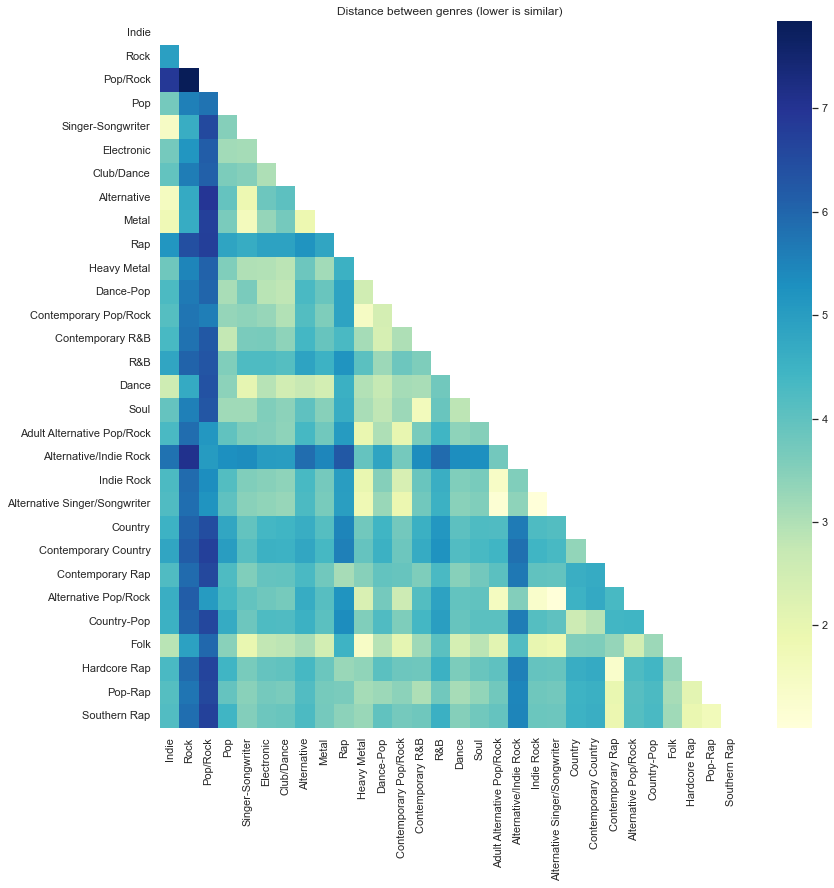

In [151]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(13)
    fig.set_figwidth(13)

    mask = np.zeros_like(df_dist)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df_dist, mask=mask, ax=axes, cmap="YlGnBu") 
axes.set_title("Distance between genres (lower is similar)")

plt.show(fig)

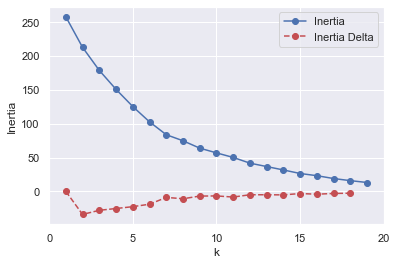

In [152]:
from sklearn.cluster import KMeans

X = df_cocurrency.values

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia, "bo-")
plt.plot(K[:-1], [0 if i == 0 else inertia[i+1]-inertia[i] for i in range(len(K)-1)], "ro--")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks([0, 5, 10, 15, 20])
plt.legend(["Inertia", "Inertia Delta"])

plt.show()

We choose 6 as the number of cluster, because it seems like an elbom

In [153]:
kmeans = KMeans(n_clusters=6).fit(X)

labels = pd.DataFrame(kmeans.labels_) # This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labelled_albuns = kmeans.predict(X)
clusters = {i: [] for i in set(labelled_albuns)}
for i, genre in enumerate(df_cocurrency.columns):
    clusters[labelled_albuns[i]].append(genre)

print(clusters)

{0: ['Pop', 'Dance-Pop', 'Contemporary R&B', 'R&B', 'Soul'], 1: ['Rap', 'Contemporary Rap', 'Hardcore Rap', 'Pop-Rap', 'Southern Rap'], 2: ['Electronic', 'Club/Dance', 'Heavy Metal', 'Contemporary Pop/Rock', 'Adult Alternative Pop/Rock', 'Alternative/Indie Rock', 'Indie Rock', 'Alternative Singer/Songwriter', 'Alternative Pop/Rock', 'Folk'], 3: ['Indie', 'Rock', 'Singer-Songwriter', 'Alternative', 'Metal', 'Dance'], 4: ['Country', 'Contemporary Country', 'Country-Pop'], 5: ['Pop/Rock']}


In [163]:
clustes_descr = {
    0: "Pop and R&B",
    1: "Rap",
    2: "Electronic and Rock Subgenres",
    3: "Mainstream Rock",
    4: "Country",
    5: "Pop/Rock"
}

# SVD (Singular Value Decomposition)

[0.205 0.19  0.134 0.101 0.086 0.055 0.032 0.029 0.029 0.022 0.02  0.019
 0.014 0.012 0.011 0.008 0.006 0.005 0.005 0.004 0.003 0.003 0.002 0.002
 0.002 0.001 0.001 0.    0.    0.   ]


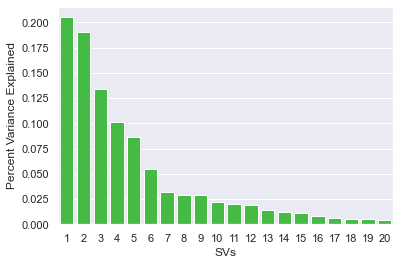

In [162]:
u, s, v = np.linalg.svd(X, full_matrices=True)

var_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(var_explained)
 
sns.barplot(x=list(range(1,len(var_explained[:20])+1)),
            y=var_explained[:20], color="limegreen")
plt.xlabel('SVs')
plt.ylabel('Percent Variance Explained')
plt.show()

In [203]:
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=df_cocurrency.columns.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index': 'Genre'}, inplace=True)
svd_df["label"] = kmeans.labels_
svd_df["descr"] = [clustes_descr[v] for v in svd_df["label"]]
svd_df["ocurr"] = [df_cocurrency_all.iloc[i, i] for i in range(len(svd_df))]
svd_df


,Genre,SV1,SV2,label,descr,ocurr
0,Indie,0.191516,0.159195,3,Mainstream Rock,261
1,Rock,0.287826,-0.057463,3,Mainstream Rock,641
2,Pop/Rock,-0.462918,-0.377499,5,Pop/Rock,681
3,Pop,0.014895,0.042737,0,Pop and R&B,292
4,Singer-Songwriter,0.142082,0.175793,3,Mainstream Rock,43
5,Electronic,0.007755,0.132132,2,Rock Subgenres,155
6,Club/Dance,-0.039917,0.188741,2,Rock Subgenres,38
7,Alternative,0.200665,0.152070,3,Mainstream Rock,231
8,Metal,0.150995,0.186545,3,Mainstream Rock,61
9,Rap,0.120753,-0.006422,1,Rap,407


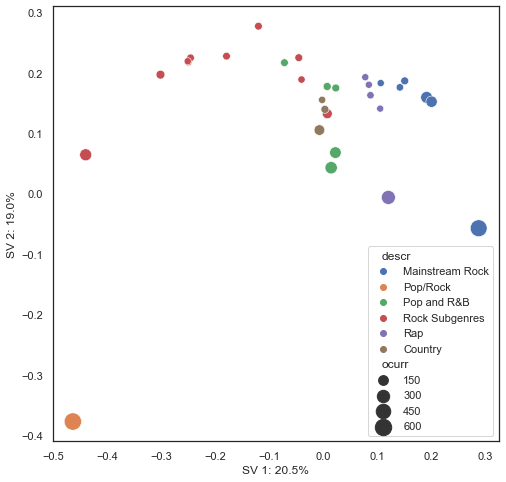

In [207]:
# specify colors for each continent
color_dict = {
    0: 'Blue',
    1: 'Orange',
    2: 'Violet',
    3: 'Red',
    4: 'Black',
    5: 'Green',
}

with sns.axes_style("white"):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(8)
    fig.set_figwidth(8)
    # Scatter plot: SV1 and SV2
    sns.scatterplot(x="SV1", y="SV2", 
                    hue="descr",
                    size="ocurr",
                    sizes=(50, 300),
                    # palette=color_dict, 
                    data=svd_df,
                    alpha=0.7, ax=axes)
    axes.set_xlabel('SV 1: {0}%'.format(var_explained[0]*100))
    axes.set_ylabel('SV 2: {0}%'.format(var_explained[1]*100))
    plt.show(fig)